# Lending Club

## Linear Classification

<a name="top">
    
# Table of Contents 

[PART A - DATA CLEANING & FEATURE ENGINEERING](#parta)<br>

1. [Import Data](#import)<br>
2. [Inspecting the Data](#inspect)<br>
3. [Cleaning the Data](#cleaning) <br>
* 3.1 [Converting non-mumerical parameters to numerical values](#numerical)<br>
* 3.2 [Drop top 100 earners](#removenulls)<br>
* 3.3 [Identify parameters with highest correlation](#correlation)<br>

[PART B - MODEL BUILDING](#partb)<br>
1. [ALL THREE VARIABLES](#all3)
* [Step 1 Prepare your data](#step1)  
* [Step 2 Create your model: Train the model](#step2)
* [Step 3 Determine the accuracy of your model](#step3)  
* [Step 4 Visualization](#step4)  
    * [Step 4.1 Confusion Matrix](#confusion)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc)
2. [loan_amnt only](#int_only)
* [Step 1 Prepare your data](#step1-2)  
* [Step 2 Create your model: Train the model](#step2-2)
* [Step 3 Determine the accuracy of your model](#step3-2)  
* [Step 4 Visualization](#step4-2)  
    * [Step 4.1 Confusion Matrix](#confusion-2)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc-2)
3. [annual_inc only](#int_loan)
* [Step 1 Prepare your data](#step1-3)  
* [Step 2 Create your model: Train the model](#step2-3)
* [Step 3 Determine the accuracy of your model](#step3-3)  
* [Step 4 Visualization](#step4-3)  
    * [Step 4.1 Confusion Matrix](#confusion-3)
    * [Step 4.2 ROC Receiver Operating Characteristic](#roc-3)

<a name="parta"/>

# PART A - DATA CLEANING & FEATURE ENGINEERING

<a name="import"/>

# 1. Import Data 

[back to top](#top)

Let us pick up from where we have left off. 

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [98]:
dataset = pd.read_csv("data/cleaned_LendingClub.csv")
dataset

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
...,...,...,...,...,...,...,...,...,...,...
38700,Fully Paid,110000.0,Not Verified,4 years,MORTGAGE,8.07%,2500,home_improvement,36 months,A
38701,Fully Paid,18000.0,Not Verified,3 years,RENT,10.28%,8500,credit_card,36 months,C
38702,Fully Paid,100000.0,Not Verified,< 1 year,MORTGAGE,8.07%,5000,debt_consolidation,36 months,A
38703,Fully Paid,200000.0,Not Verified,< 1 year,MORTGAGE,7.43%,5000,other,36 months,A


<a name="inspect"/>

# 2. Inspecting the data

[back to top](#top)

Do you have any null values? This data is pretty clean

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          38705 non-null  object 
 1   annual_inc           38705 non-null  float64
 2   verification_status  38705 non-null  object 
 3   emp_length           38705 non-null  object 
 4   home_ownership       38705 non-null  object 
 5   int_rate             38705 non-null  object 
 6   loan_amnt            38705 non-null  int64  
 7   purpose              38705 non-null  object 
 8   term                 38705 non-null  object 
 9   grade                38705 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.0+ MB


In [20]:
dataset['annual_inc'].value_counts(normalize=True)

60000.0    0.038083
50000.0    0.026844
40000.0    0.022194
45000.0    0.021108
75000.0    0.020824
             ...   
22404.0    0.000026
15085.0    0.000026
57491.0    0.000026
22188.0    0.000026
27376.0    0.000026
Name: annual_inc, Length: 5105, dtype: float64

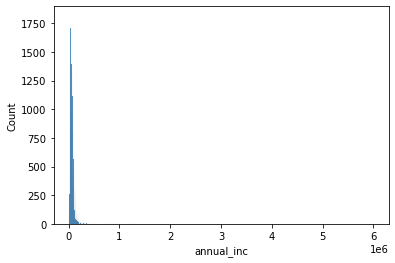

In [44]:
ax=sns.histplot(data=dataset, x='annual_inc')

Something is wrong with the annual income data!

In [54]:
dataset['annual_inc'].describe()

count    3.870500e+04
mean     6.961750e+04
std      6.422378e+04
min      4.000000e+03
25%      4.149600e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [68]:
dataset.nlargest(100, 'annual_inc')

,loan_paid,annual_inc,yrs_employed,loan_amnt,int_rate_%
29172,1,6000000.0,10,5000,12.73
28719,1,3900000.0,3,25000,10.62
38080,1,2039784.0,0,8450,12.29
22797,1,1900000.0,5,1500,6.17
7011,1,1782000.0,10,12025,14.27
...,...,...,...,...,...
5636,0,400000.0,2,17625,23.91
7582,1,400000.0,5,28000,7.49
17548,1,400000.0,10,17600,20.85
25135,1,400000.0,10,25000,11.12


Going to remove these top 100 rows.

(0.0, 300000.0)

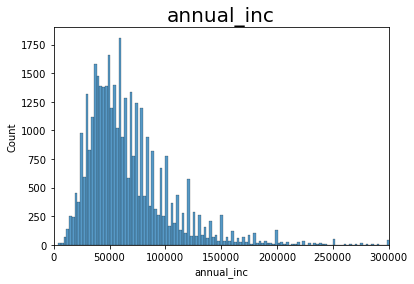

In [78]:
ax=sns.histplot(data=dataset, x='annual_inc')
plt.title(label="annual_inc",
          fontsize=20)
plt.xlim(0, 300000)

That's better!

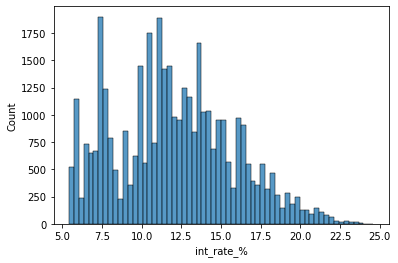

In [80]:
ax=sns.histplot(data=dataset, x='int_rate_%')

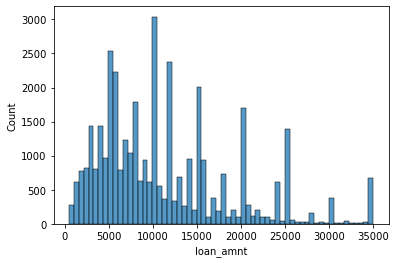

In [81]:
ax=sns.histplot(data=dataset, x='loan_amnt')

<a name="cleaning"/>

# 3. Cleaning the data

<a name="numerical"/>

## 3.1 Leaving only numerical values 

[back to top](#top)

In [6]:
#reset
dataset = pd.read_csv("data/cleaned_LendingClub.csv")

In [100]:

#Add new rows
#loan_paid (yes or no) to represent loan_status
dataset.insert(1, "loan_paid",0)
dataset.loc[dataset['loan_status']=="Fully Paid",'loan_paid']=1
dataset.drop(['loan_status'], axis=1,inplace=True)

#dropping non-numerical
dataset.drop(['verification_status'], axis=1,inplace=True)
dataset.drop(['home_ownership'], axis=1,inplace=True)
dataset.drop(['purpose'], axis=1,inplace=True)
dataset.drop(['term'], axis=1,inplace=True)
dataset.drop(['grade'], axis=1,inplace=True)

#yrs_employed to represent represent emp_length
dataset["emp_length"].replace({"< 1 year": "0"}, inplace=True)
dataset.insert(3, "yrs_employed",dataset['emp_length'].str.replace(r'\D','').astype(int))
dataset.drop(['emp_length'], axis=1,inplace=True)


#int_rate_ to represent represent int_rate
dataset.insert(5, "int_rate_%",dataset['int_rate'].str.rstrip('%').astype('float'))
dataset.drop(['int_rate'], axis=1,inplace=True)

dataset

/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_17803/2910411501.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.insert(3, "yrs_employed",dataset['emp_length'].str.replace(r'\D','').astype(int))


,loan_paid,annual_inc,yrs_employed,loan_amnt,int_rate_%
0,1,24000.0,10,5000,10.65
1,0,30000.0,0,2500,15.27
2,1,12252.0,10,2400,15.96
3,1,49200.0,10,10000,13.49
4,1,80000.0,1,3000,12.69
...,...,...,...,...,...
38700,1,110000.0,4,2500,8.07
38701,1,18000.0,3,8500,10.28
38702,1,100000.0,0,5000,8.07
38703,1,200000.0,0,5000,7.43


<a name="removenulls"/>

## 3.2 Drop top 100 earners

[back to top](#top)

In [ ]:
#drop rows where annual_inc >=399996.0

In [101]:
dataset = dataset.drop(dataset[(dataset.annual_inc >= 399996.0)].index)
dataset

,loan_paid,annual_inc,yrs_employed,loan_amnt,int_rate_%
0,1,24000.0,10,5000,10.65
1,0,30000.0,0,2500,15.27
2,1,12252.0,10,2400,15.96
3,1,49200.0,10,10000,13.49
4,1,80000.0,1,3000,12.69
...,...,...,...,...,...
38700,1,110000.0,4,2500,8.07
38701,1,18000.0,3,8500,10.28
38702,1,100000.0,0,5000,8.07
38703,1,200000.0,0,5000,7.43


In [71]:
38705-38605

100

In [74]:
print("we removed", 100/38705 *100, "%")

we removed 0.258364552383413 %


In [75]:
dataset.shape

(38605, 5)

<a name="correlation"/>

## 3.3 Identify parameters with highest correlation

[back to top](#top)

In [76]:
cor=dataset.corr()
cor

,loan_paid,annual_inc,yrs_employed,loan_amnt,int_rate_%
loan_paid,1.000000,0.058515,-0.013240,-0.053291,-0.199905
annual_inc,0.058515,1.000000,0.160861,0.410533,0.081647
yrs_employed,-0.013240,0.160861,1.000000,0.155418,0.006591
loan_amnt,-0.053291,0.410533,0.155418,1.000000,0.308584
int_rate_%,-0.199905,0.081647,0.006591,0.308584,1.000000


In [77]:
abs_cor=abs(dataset.corr())
high_cor = abs_cor['loan_paid']>0.05
abs_cor['loan_paid'][high_cor].sort_values(ascending=False).to_frame()

,loan_paid
loan_paid,1.000000
int_rate_%,0.199905
annual_inc,0.058515
loan_amnt,0.053291


plot a pie chart with percentages

<AxesSubplot:ylabel='loan_paid'>

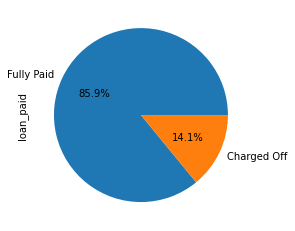

In [82]:
dataset['loan_paid'].value_counts(normalize=True).plot.pie(labels=['Fully Paid', 'Charged Off'],autopct='%1.1f%%')

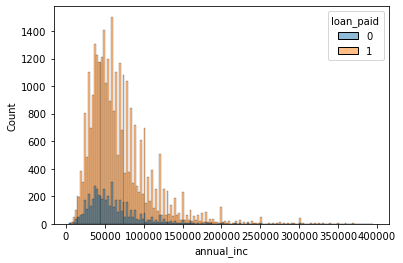

In [84]:
ax=sns.histplot(data=dataset, x='annual_inc', hue='loan_paid')

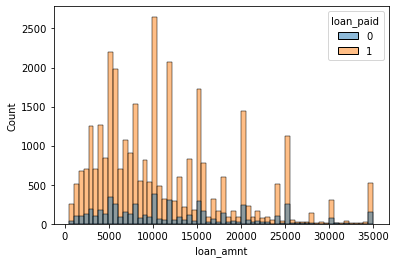

In [85]:
ax=sns.histplot(data=dataset, x='loan_amnt', hue='loan_paid')

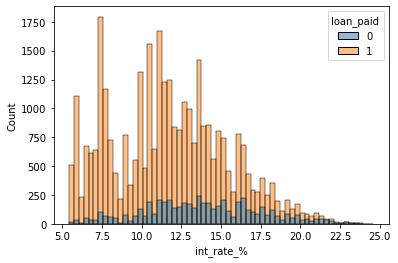

In [86]:
ax=sns.histplot(data=dataset, x='int_rate_%', hue='loan_paid')

If you paid off your loan you were more likely to have a shorter term loan than someone who didn't pay off their loan.

<a name="partb"/>

# PART B- MODEL BUILDING


<a name="all3"/>

# 1.0 ALL THREE VARIABLES

<a name="step1"/>

# Step 1 Prepare your data

[back to top](#top)

In [102]:
y=dataset['loan_paid']
X=dataset[['int_rate_%','loan_amnt','annual_inc']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

<a name="step2"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [104]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Prediction of results i.e. Using the trained model above, predict the results on the test set.
This is y_predict!

In [105]:
lr.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

Let's get the prediction of the probabilty of that someoene will pay off the loan.

In [106]:
lr.predict_proba(X_test)[:,1]

array([0.83467958, 0.76796632, 0.75581937, ..., 0.88402365, 0.86161622,
       0.96455732])

* The class assignment of X is 1 if the prob that Y =1 is more than or equal to 0.5.
* else the class assignment of X is 0

$X_i$ = 1 if P ( Y=1 | X ) >= 0.5 else 0

y = f(X) =$\frac{1}{1+e^X\beta}$

To compare the models, we will use **accuracy score**. 

To read more about different available metrics for quantifying the quality of predictions in scikit-learn library, read [this](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

<a name="step3"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [107]:
accuracy = {}

In [110]:
accuracy['All_3_parameters_roc'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'All_3_parameters_roc': 0.8583085092604585}

In [111]:
accuracy['All_3_parameters_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['All_3_parameters_auc_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'All_3_parameters_roc': 0.8583085092604585,
 'All_3_parameters_auc': 0.5,
 'All_3_parameters_auc_prob': 0.5666927772347846}

<a name="step4"/>

# Step 4 Visualization

<a name="confusion"/>

## Confusion Matrix

[back to top](#top)

In [112]:
#Get the confusion matrix
cf_matrix=confusion_matrix(y_test, lr.predict(X_test))
cf_matrix

array([[   0, 1094],
       [   0, 6627]])

In [113]:
#source code https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
#group_percentages = [“{0:.2%}”.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

<AxesSubplot:>

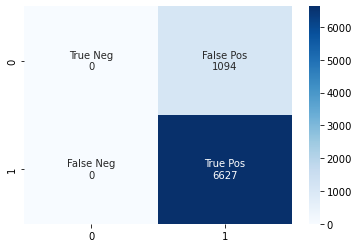

In [114]:
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<a name="roc"/>

## ROC Receiver Operating Characteristic

[back to top](#top)

In [115]:
probas = lr.predict_proba(X_test)[:, 1]

In [116]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]


In [117]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

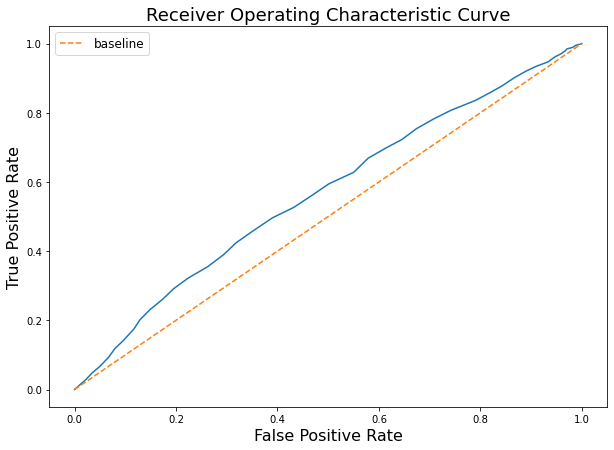

In [118]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend(fontsize=12);

In [119]:
roc_auc_score(y_test, preds)

0.5

In [120]:
roc_auc_score(y_test, probas)

0.5666927772347846

<a name="int_only"/>

# 2.0 loan_amnt only

<a name="step1-2"/>

# Step 1 Prepare your data

[back to top](#top)

In [121]:
y=dataset['loan_paid']
X=dataset[['loan_amnt']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<a name="step2-2"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [123]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

<a name="step3-2"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [124]:
accuracy['loan_amnt'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'All_3_parameters_roc': 0.8583085092604585,
 'All_3_parameters_auc': 0.5,
 'All_3_parameters_auc_prob': 0.5666927772347846,
 'loan_amnt': 0.8623235332210853}

In [125]:
accuracy['loan_amnt_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['loan_amnt_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'All_3_parameters_roc': 0.8583085092604585,
 'All_3_parameters_auc': 0.5,
 'All_3_parameters_auc_prob': 0.5666927772347846,
 'loan_amnt': 0.8623235332210853,
 'loan_amnt_auc': 0.5,
 'loan_amnt_prob': 0.5311149320080357}

<a name="step4-2"/>

# Step 4 Visualization

<a name="confusion-2"/>

## Confusion Matrix

[back to top](#top)

In [126]:
#Get the confusion matrix
cf_matrix=confusion_matrix(y_test, lr.predict(X_test))
cf_matrix

array([[   0, 1063],
       [   0, 6658]])

In [127]:
#source code https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
#group_percentages = [“{0:.2%}”.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

<AxesSubplot:>

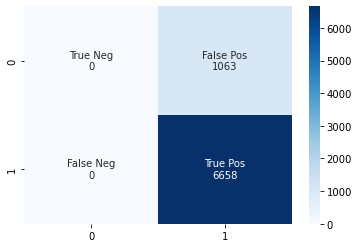

In [128]:
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<a name="roc-2"/>

## ROC Receiver Operating Characteristic

[back to top](#top)

In [129]:
probas = lr.predict_proba(X_test)[:, 1]

In [130]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [131]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

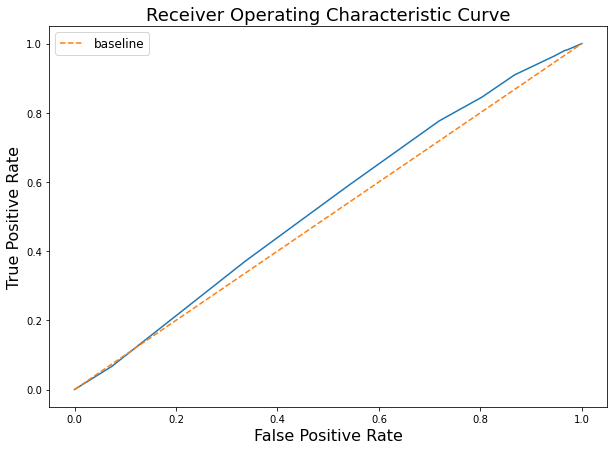

In [132]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend(fontsize=12);


<a name="int_loan"/>

# 3.0 annual_inc only

<a name="step1-3"/>

# Step 1 Prepare your data

[back to top](#top)

In [133]:
y=dataset['loan_paid']
X=dataset[['annual_inc']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<a name="step2-3"/>

# Step 2 Create your model: Train the model

[back to top](#top)

In [135]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

<a name="step3-3"/>

# Step 3 Determine the accuracy of your model

[back to top](#top)

In [136]:
accuracy['annual_inc_roc'] = accuracy_score(y_test, lr.predict(X_test))
accuracy

{'All_3_parameters_roc': 0.8583085092604585,
 'All_3_parameters_auc': 0.5,
 'All_3_parameters_auc_prob': 0.5666927772347846,
 'loan_amnt': 0.8623235332210853,
 'loan_amnt_auc': 0.5,
 'loan_amnt_prob': 0.5311149320080357,
 'annual_inc_roc': 0.8585675430643699}

In [137]:
accuracy['annual_inc_auc'] = roc_auc_score(y_test, lr.predict(X_test))
accuracy['annual_inc_auc_prob'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
accuracy

{'All_3_parameters_roc': 0.8583085092604585,
 'All_3_parameters_auc': 0.5,
 'All_3_parameters_auc_prob': 0.5666927772347846,
 'loan_amnt': 0.8623235332210853,
 'loan_amnt_auc': 0.5,
 'loan_amnt_prob': 0.5311149320080357,
 'annual_inc_roc': 0.8585675430643699,
 'annual_inc_auc': 0.5,
 'annual_inc_auc_prob': 0.5445758922527666}

----